# Examen de Sistemas Inteligentes junio 2024
## Parte práctica
### Nombre del alumno

David Ferreras Díaz

***

**Instrucciones:** Carga el fichero pet_adoption_data.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
df = pd.read_csv("./pet_adoption_data.csv")

# Conteo Nan y drop
countNaN = df.isna().sum()
print(countNaN)
df = df.dropna(how="any")
countNaN = df.isna().sum()
print(countNaN)
df = df.drop("PetID",axis=1)

size_map = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

df['Size'] = df['Size'].map(size_map)
display(df['Size'])
df_hist = df
PetType = df["PetType"].to_numpy()
df = df.drop("PetType", axis=1)
Breed = df["Breed"].to_numpy()
df = df.drop("Breed", axis=1)
Color = df["Color"].to_numpy()
df = df.drop("Color", axis=1)
#Vaccinated = df["Vaccinated"].to_numpy()
#df = df.drop("Vaccinated", axis=1)
#HealthCondition = df["HealthCondition"].to_numpy()
#df = df.drop("HealthCondition", axis=1)
#PreviousOwner = df["PreviousOwner"].to_numpy()
#df = df.drop("PreviousOwner", axis=1)

encoder = OneHotEncoder(sparse_output=False)
PetType = encoder.fit_transform(PetType.reshape(-1,1))
Breed = encoder.fit_transform(Breed.reshape(-1,1))
Color = encoder.fit_transform(Color.reshape(-1,1))
#Vaccinated = encoder.fit_transform(Vaccinated.reshape(-1,1))
#HealthCondition = encoder.fit_transform(HealthCondition.reshape(-1,1))
#PreviousOwner = encoder.fit_transform(PreviousOwner.reshape(-1,1))


Y = df["AdoptionLikelihood"].to_numpy()
X = df.drop("AdoptionLikelihood", axis=1)
X = X.to_numpy()


print(X.shape)
print(Y.shape)
X = np.hstack((X, PetType, Breed, Color))
print(X.shape)

X_scaled = MinMaxScaler().fit_transform(X) #MinMaxScaler para salidas entre 0 y 1

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y,
    test_size=0.2,
    random_state=13,
    stratify=Y
)

print(x_train.shape)
print(x_test.shape)


PetID                 2
PetType               1
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              1
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64
PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


0       2
1       2
2       1
3       0
4       2
       ..
2002    0
2003    0
2004    0
2005    2
2006    1
Name: Size, Length: 2003, dtype: int64

(2003, 5)
(2003,)
(2003, 27)
(1602, 27)
(401, 27)


### Ejercicio 2

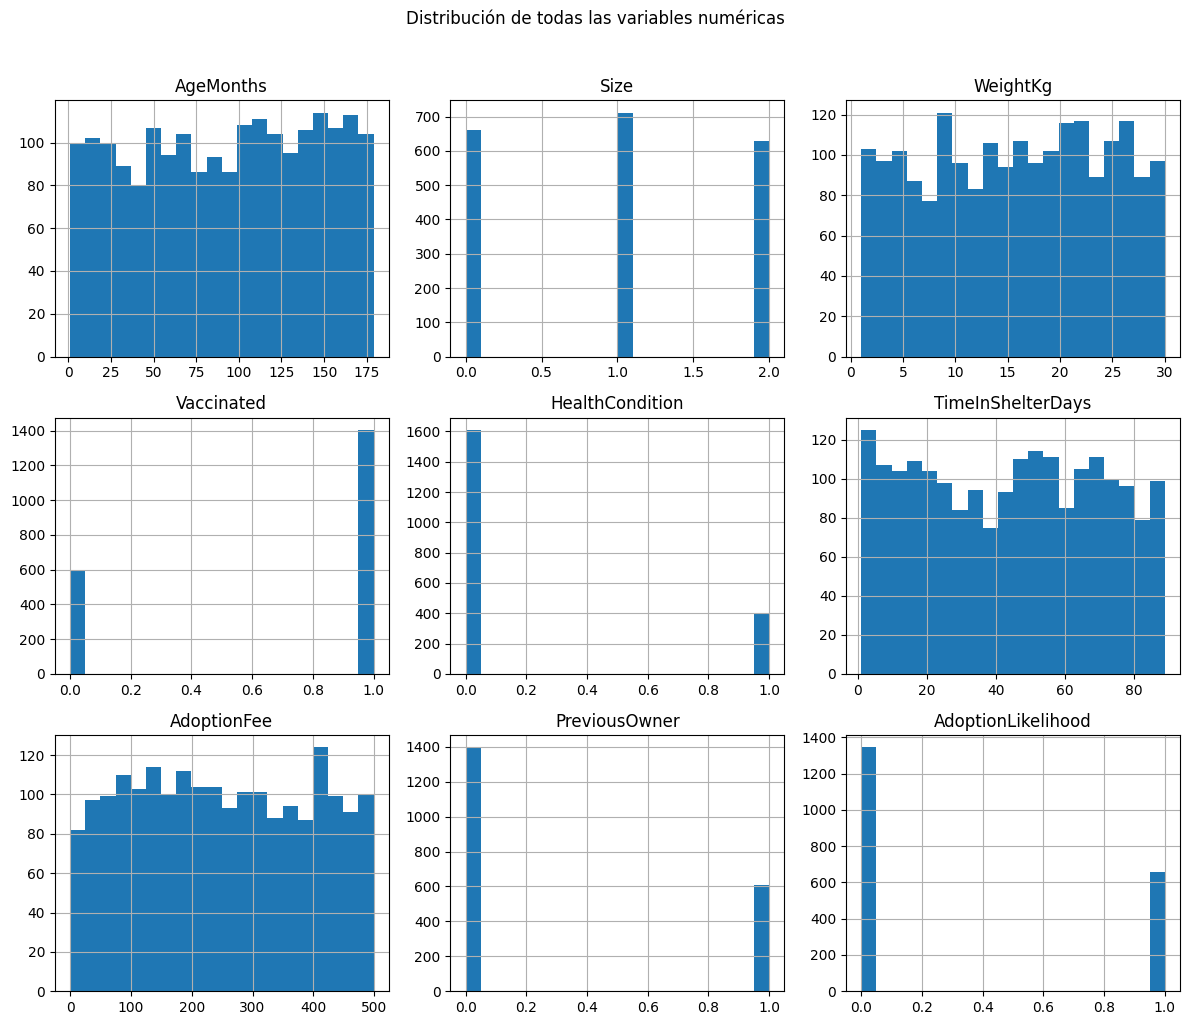

In [146]:
import matplotlib.pyplot as plt
df_hist.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de todas las variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

### Ejercicio 3

In [194]:
from sklearn.neural_network import MLPClassifier
import time 

t_p = time.time()
model_p = MLPClassifier(hidden_layer_sizes= (100,30), max_iter=300, alpha=0.01, learning_rate_init=0.009, random_state=13).fit(x_train, y_train)
t_p = time.time() - t_p

In [195]:
y_pred_p = model_p.predict(x_test)
acc_p = model_p.score(x_test, y_test)
print(acc_p)

0.9102244389027432


### Ejercicio 4

In [149]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=13,
    max_depth=10,
    min_samples_split=3,
)
# Tiempo y modelo
t_init = time.time()
dt_model.fit(x_train, y_train)
t_decTree = time.time() - t_init

In [150]:
y_pred_dt = dt_model.predict(x_test)
acc_dt = dt_model.score(x_test, y_test)
print(acc_dt)

0.9201995012468828


### Ejercicio 5

In [151]:
from sklearn.metrics import confusion_matrix
print(f"Perceptron: {acc_p:.4f} Time: {t_p:.2f}")
print(f"Decision Tree: {acc_dt:.4f} Time: {t_decTree:.2f}")

def matrix_view(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, index=['Actual 0 (improbable)', 'Actual 1 (probable)'],
    columns=['Pred 0 (improbable)', 'Pred 1 (probable)'])
    print(cm_df)

matrix_view(y_test, y_pred_p)
matrix_view(y_test, y_pred_dt)

Perceptron: 0.8703 Time: 0.41
Decision Tree: 0.9202 Time: 0.01
                       Pred 0 (improbable)  Pred 1 (probable)
Actual 0 (improbable)                  233                 36
Actual 1 (probable)                     16                116
                       Pred 0 (improbable)  Pred 1 (probable)
Actual 0 (improbable)                  250                 19
Actual 1 (probable)                     13                119
